#INDONESIA COAL STOCK ANALYSIS

In this project, we will focus on Indonesia's Coal Stocks analysis and their relation to the worldwide coal price from 2010 to 2020. We will focus on 3 coal stocks in Indonesia; PT Adaro Energy Tbk (ADRO), PT Indika Energy Tbk (INDY), PT Bukit Asam Tbk (PTBA), and PT Indo Tambangraya Megah Tbk (ITMG)

## Get the Data

In this section we will read data from yahoo finance using pandas!



### The Imports

We are using pandas-datareader to be able to read data directly from yahoo finance. We are also importing the usual libraries, such as numpy, pandas, and datetime (for time format)

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime

## Data

We need to get data using pandas datareader. We will get stock information for the following company:
*  PT Adaro Energy Tbk
*  PT Indika Energy Tbk 
*  PT Bukit Asam Tbk 
*  PT Indo Tambangraya Megah Tbk


In [2]:
#Set the start and end time

In [6]:
start = datetime.datetime(2016,1,1)
end = datetime.datetime(2021,1,1)

In [7]:
# PT Adaro Energy Tbk
ADRO = data.DataReader("ADRO.JK", 'yahoo', start, end)

# PT Indika Energy Tbk 
INDY = data.DataReader("INDY.JK", 'yahoo', start, end)

# PT Bukit Asam Tbk
PTBA = data.DataReader("PTBA.JK", 'yahoo', start, end)

# PT Indo Tambangraya Megah Tbk
ITMG = data.DataReader("ITMG.JK", 'yahoo', start, end)


Create a list of the tickers symbol for each stock and then concatenate it with each of the stock

In [8]:
tickers = ['ADRO', 'INDY', 'PTBA', 'ITMG']
coal_stocks = pd.concat([ADRO, INDY, PTBA, ITMG/5],axis=1,keys=tickers)
stocks_coal = pd.concat([ADRO, INDY, PTBA, ITMG],axis=1,keys=tickers)

In [9]:
coal_stocks.columns.names = ['Coal Ticker','Stock Info']
stocks_coal.columns.names = ['Coal Ticker','Stock Info']

In [10]:
coal_stocks.head()

Coal Ticker   ADRO                                                INDY         \
Stock Info    High    Low   Open  Close      Volume   Adj Close   High    Low   
Date                                                                            
2016-01-04   515.0  494.0  510.0  494.0  20864700.0  379.715149  112.0  110.0   
2016-01-05   510.0  495.0  500.0  499.0  22509400.0  383.558441  115.0  110.0   
2016-01-06   510.0  495.0  499.0  500.0  49150500.0  384.327057  118.0  111.0   
2016-01-07   500.0  485.0  495.0  485.0  23583700.0  372.797241  114.0  110.0   
2016-01-08   499.0  490.0  490.0  493.0  18186900.0  378.946472  112.0  109.0   

Coal Ticker                ...   PTBA                                   ITMG  \
Stock Info    Open  Close  ...   Open  Close      Volume   Adj Close    High   
Date                       ...                                                 
2016-01-04   111.0  110.0  ...  900.0  867.0  13150000.0  584.654114  1170.0   
2016-01-05   110.0  111.0  ...  866.0  902.0  25770500.0  608.256165  1190.0   
2016-01-06   112.0  114.0  ...  902.0  902.0  11862500.0  608.256165  1170.0   
2016-01-07   114.0  110.0  ...  895.0  869.0  14824000.0  586.002808  1160.0   
2016-01-08   112.0  110.0  ...  867.0  861.0  20228500.0  580.608093  1155.0   

Coal Ticker                                                
Stock Info      Low    Open   Close    Volume   Adj Close  
Date                                                       
2016-01-04   1140.0  1155.0  1145.0  254400.0  682.787744  
2016-01-05   1145.0  1160.0  1155.0  257240.0  688.750928  
2016-01-06   1145.0  1160.0  1165.0   84620.0  694.714062  
2016-01-07   1120.0  1145.0  1160.0  141880.0  691.732471  
2016-01-08   1125.0  1125.0  1150.0   85040.0  685.769385  

[5 rows x 24 columns]

In [79]:
stocks_coal.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2016-01-04 to 2020-12-23
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (ADRO, High)       1259 non-null   float64
 1   (ADRO, Low)        1259 non-null   float64
 2   (ADRO, Open)       1259 non-null   float64
 3   (ADRO, Close)      1259 non-null   float64
 4   (ADRO, Volume)     1259 non-null   float64
 5   (ADRO, Adj Close)  1259 non-null   float64
 6   (INDY, High)       1259 non-null   float64
 7   (INDY, Low)        1259 non-null   float64
 8   (INDY, Open)       1259 non-null   float64
 9   (INDY, Close)      1259 non-null   float64
 10  (INDY, Volume)     1259 non-null   float64
 11  (INDY, Adj Close)  1259 non-null   float64
 12  (PTBA, High)       1259 non-null   float64
 13  (PTBA, Low)        1259 non-null   float64
 14  (PTBA, Open)       1259 non-null   float64
 15  (PTBA, Close)      1259 non-null   float64
 16  (PTBA,

In [7]:
coal_stocks.xs(key='Close', axis=1, level='Stock Info').max()

Coal Ticker
ADRO    2560.0
INDY    4550.0
PTBA    4890.0
ITMG    6340.0
dtype: float64

Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [11]:
returns = pd.DataFrame()

Fill the returns datafram with each stock return

In [12]:
for tick in tickers:
    returns[tick+' Return']=coal_stocks[tick]['Close'].pct_change()

returns.head()

,ADRO Return,INDY Return,PTBA Return,ITMG Return
Date,,,,
2016-01-04,NaN,NaN,NaN,NaN
2016-01-05,0.010121,0.009091,0.040369,0.008734
2016-01-06,0.002004,0.027027,0.000000,0.008658
2016-01-07,-0.030000,-0.035088,-0.036585,-0.004292
2016-01-08,0.016495,0.000000,-0.009206,-0.008621


# Visualization

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set_style('whitegrid')
%matplotlib inline

Plotting the scatter plot to see if there are some correlation for each stock (will be deeper discussed later).

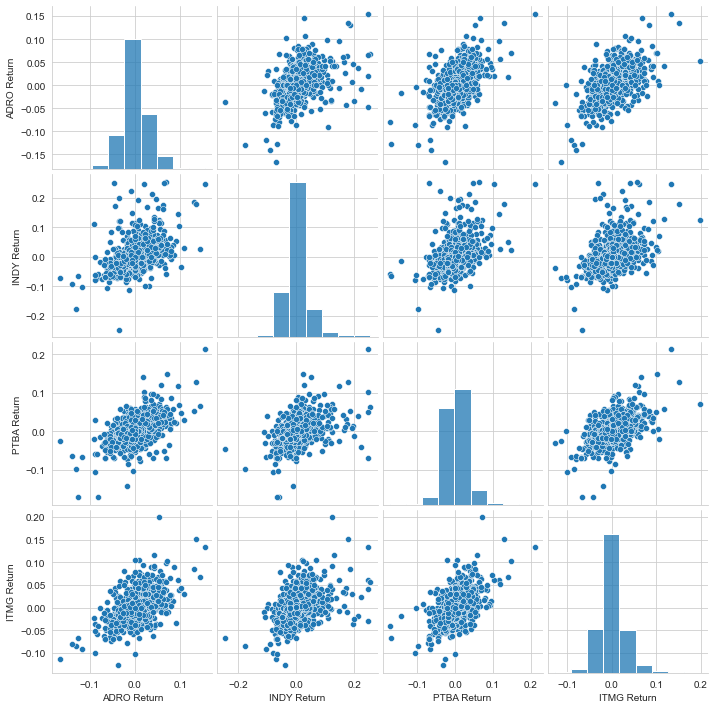

In [11]:
sns.pairplot(returns[1:], diag_kind='hist',diag_kws=dict(bins=9))

Finding the date of the maximum and minimum price

In [12]:
returns.idxmin()

ADRO Return   2018-04-30
INDY Return   2017-05-10
PTBA Return   2017-09-13
ITMG Return   2019-04-04
dtype: datetime64[ns]

In [13]:
returns.idxmax()

ADRO Return   2020-03-20
INDY Return   2019-06-25
PTBA Return   2020-03-20
ITMG Return   2016-02-26
dtype: datetime64[ns]

Text(0.5, 1.0, 'ITMG Return')

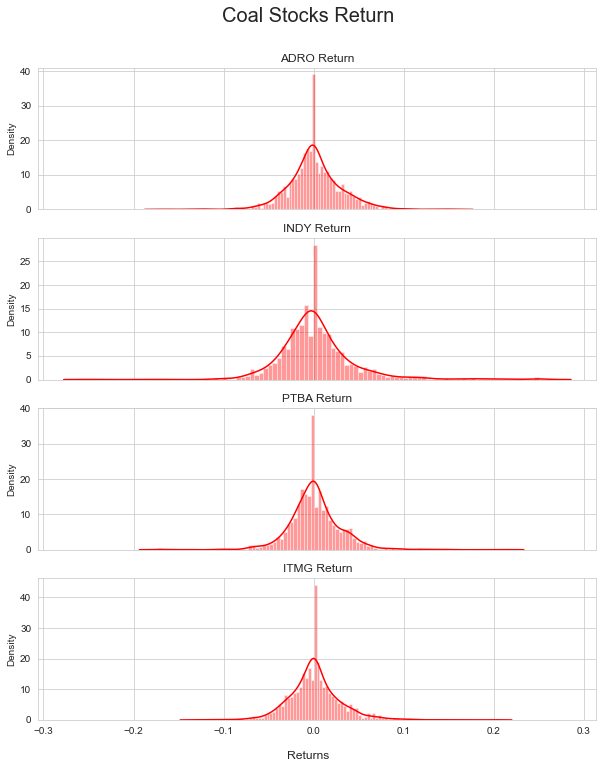

In [14]:
fig, axes = plt.subplots(4, 1, figsize=(10, 12), sharex=True)
fig.suptitle('Coal Stocks Return', y=0.95, fontsize=20)
fig.text(0.5, 0.08, 'Returns', ha='center', fontsize=12)


sns.distplot(ax=axes[0], a=returns['ADRO Return'], bins=100, color='red')
axes[0].set_title('ADRO Return')

sns.distplot(ax=axes[1], a=returns['INDY Return'], bins=100, color='red')
axes[1].set_title('INDY Return')

sns.distplot(ax=axes[2], a=returns['PTBA Return'], bins=100, color='red')
axes[2].set_title('PTBA Return')

sns.distplot(ax=axes[3], a=returns['ITMG Return'], bins=100, color='red', axlabel=False)
axes[3].set_title('ITMG Return')


We will try to visualize each stocks return from 2016-2021 to see if there are some patterns in the plot.

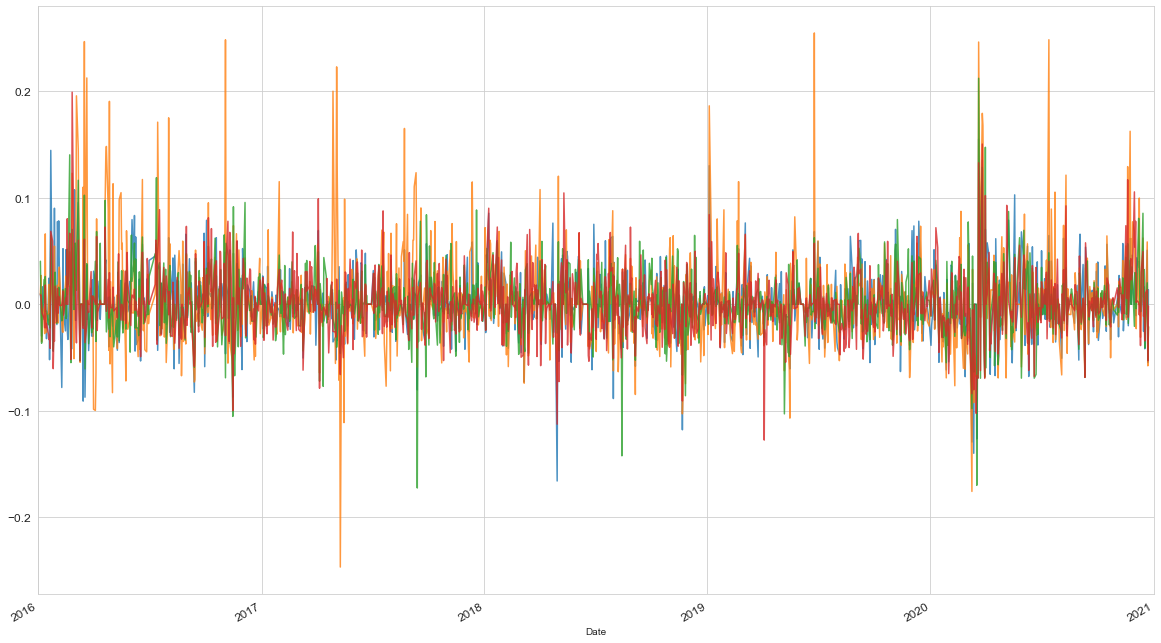

In [15]:
plt.figure(figsize=(20,12))
for tick in tickers:
    returns[tick+' Return'].plot(alpha=0.8, fontsize=12).set_xlim(['2016-01-01','2021-01-01'])

From the plot above, it can be seen that there are some times where each returns are around the same whether it is positive or negative. Next, we will try to visualize more about each stocks price and see clearer about the patterns.

## Imports

We will be using plotly and cufflinks for a better and more interactive visualizations.

In [14]:
import plotly
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

We will create a line plot showing Close price for each coal for the entire index of time. For ITMG stocks, we are using the one that is divided by 5, just for the sake of visualizations (because if it was the original price, we will not see clear enough the patterns for all of the stocks)

Text(2, 0.5, 'Price (Rp / stock)')

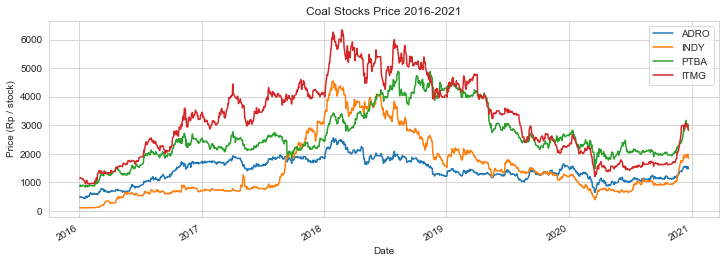

In [17]:
for tick in tickers:
    coal_stocks[tick]['Close'].plot(figsize=(12,4), label=tick)
plt.legend()
plt.title('Coal Stocks Price 2016-2021')
plt.ylabel('Price (Rp / stock)', x=2)


In [18]:
plt.figure(figsize=(12,6))
coal_stocks.xs(key='Close', axis=1, level='Stock Info').iplot(title='Coal Stocks Price 2016-2020')


<Figure size 864x432 with 0 Axes>

See the Coal Stocks Price [here](https://chart-studio.plotly.com/~ihsan.alhasinun/5.embed)

Based on the line plot above, there are some interesting things that we can see. There are some moments that all of the four stocks behave the same way, we will just focusing on two moments that are clear to see. The first one is rising price mid-end 2017 and the second one is falling price in the beginning of 2020.

# More Exploration

Let's take a closer look for those two moments. First we are gonna look into their prices in 2017, and explore what is the exact moment that the prices started to rise. Here, we plot each of the stock to get a clearer view of each stocks behaviour.

__Note: We are using the original price for ITMG, because we want to see each individual stocks, so there is no need to make it in the similar price range with others__

In [19]:
stocks_coal.head()

Coal Ticker   ADRO                                                INDY         \
Stock Info    High    Low   Open  Close      Volume   Adj Close   High    Low   
Date                                                                            
2016-01-04   515.0  494.0  510.0  494.0  20864700.0  379.715149  112.0  110.0   
2016-01-05   510.0  495.0  500.0  499.0  22509400.0  383.558441  115.0  110.0   
2016-01-06   510.0  495.0  499.0  500.0  49150500.0  384.327057  118.0  111.0   
2016-01-07   500.0  485.0  495.0  485.0  23583700.0  372.797241  114.0  110.0   
2016-01-08   499.0  490.0  490.0  493.0  18186900.0  378.946472  112.0  109.0   

Coal Ticker                ...   PTBA                                   ITMG  \
Stock Info    Open  Close  ...   Open  Close      Volume   Adj Close    High   
Date                       ...                                                 
2016-01-04   111.0  110.0  ...  900.0  867.0  13150000.0  447.755554  5850.0   
2016-01-05   110.0  111.0  ...  866.0  902.0  25770500.0  465.831024  5950.0   
2016-01-06   112.0  114.0  ...  902.0  902.0  11862500.0  465.831024  5850.0   
2016-01-07   114.0  110.0  ...  895.0  869.0  14824000.0  448.788391  5800.0   
2016-01-08   112.0  110.0  ...  867.0  861.0  20228500.0  444.656860  5775.0   

Coal Ticker                                                  
Stock Info      Low    Open   Close     Volume    Adj Close  
Date                                                         
2016-01-04   5700.0  5775.0  5725.0  1272000.0  3413.938721  
2016-01-05   5725.0  5800.0  5775.0  1286200.0  3443.754639  
2016-01-06   5725.0  5800.0  5825.0   423100.0  3473.570312  
2016-01-07   5600.0  5725.0  5800.0   709400.0  3458.662354  
2016-01-08   5625.0  5625.0  5750.0   425200.0  3428.846924  

[5 rows x 24 columns]

Text(0.5, 1.0, 'ITMG Stock Price')

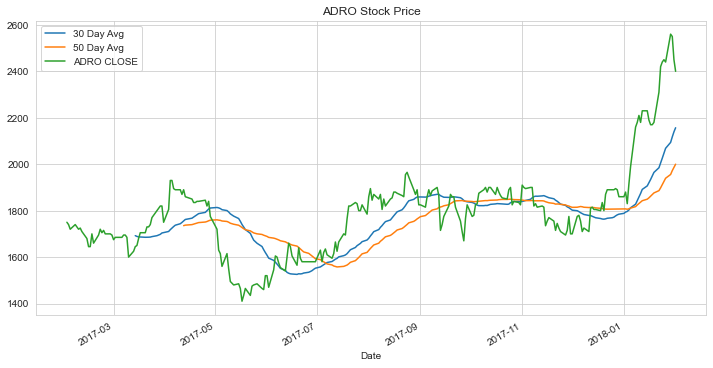

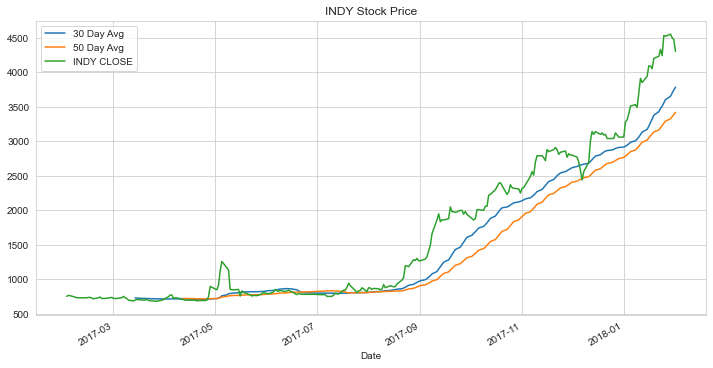

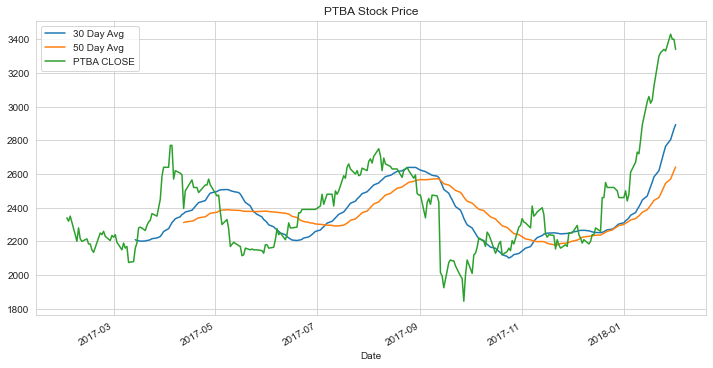

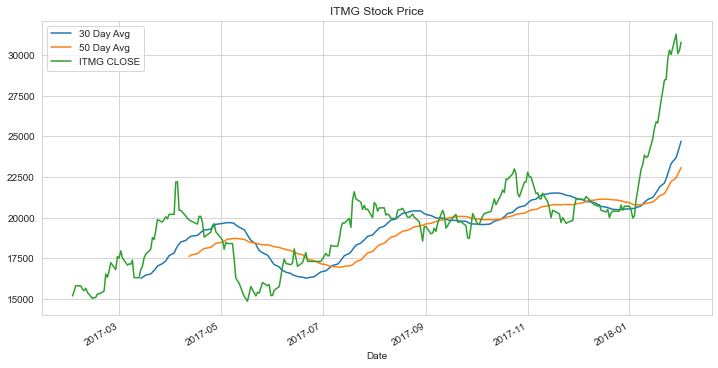

In [20]:
plt.figure(figsize=(12,6))
stocks_coal['ADRO']['Close'].loc['2017-02-01':'2018-02-01'].rolling(window=30).mean().plot(label='30 Day Avg')
stocks_coal['ADRO']['Close'].loc['2017-02-01':'2018-02-01'].rolling(window=50).mean().plot(label='50 Day Avg')
stocks_coal['ADRO']['Close'].loc['2017-02-01':'2018-02-01'].plot(label='ADRO CLOSE')
plt.legend()
plt.title('ADRO Stock Price')

plt.figure(figsize=(12,6))
stocks_coal['INDY']['Close'].loc['2017-02-01':'2018-02-01'].rolling(window=30).mean().plot(label='30 Day Avg')
stocks_coal['INDY']['Close'].loc['2017-02-01':'2018-02-01'].rolling(window=50).mean().plot(label='50 Day Avg')
stocks_coal['INDY']['Close'].loc['2017-02-01':'2018-02-01'].plot(label='INDY CLOSE')
plt.legend()
plt.title('INDY Stock Price')


plt.figure(figsize=(12,6))
stocks_coal['PTBA']['Close'].loc['2017-02-01':'2018-02-01'].rolling(window=30).mean().plot(label='30 Day Avg')
stocks_coal['PTBA']['Close'].loc['2017-02-01':'2018-02-01'].rolling(window=50).mean().plot(label='50 Day Avg')
stocks_coal['PTBA']['Close'].loc['2017-02-01':'2018-02-01'].plot(label='PTBA CLOSE')
plt.legend()
plt.title('PTBA Stock Price')

plt.figure(figsize=(12,6))
stocks_coal['ITMG']['Close'].loc['2017-02-01':'2018-02-01'].rolling(window=30).mean().plot(label='30 Day Avg')
stocks_coal['ITMG']['Close'].loc['2017-02-01':'2018-02-01'].rolling(window=50).mean().plot(label='50 Day Avg')
stocks_coal['ITMG']['Close'].loc['2017-02-01':'2018-02-01'].plot(label='ITMG CLOSE')
plt.legend()
plt.title('ITMG Stock Price')


## Analysis of Rising Prices in 2017

From the plots above we can see that the trends for each coal stocks price in 2017 were increasing. Well, PTBA is a bit different because it was plunging at around September for a moment before increasing, but overall the stocks price were increasing. Especially starting around September and they reached their peak at the end of the year.

After doing some research, the rising of the coal stock prices in 2017 was because there was a rising in coal prices. The main reason is that the global coal demand rose by 1% in 2017 and 0.7% in 2018. It was a great reversal trend, because it was the first time that the coal demand rose following the 2-year decline from 2014-2016 ([Sylvie](https://www.ifri.org/sites/default/files/atoms/files/cornotgandolphe_global_coal_market_2019.pdf), 2019).

### China Contribution

The price of coal exported from Australia, FOB Newcastle (The one that is used as the benchmark price), was around 60 USD/t in 2016 ([Arinaldo](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwjvyOWnhIruAhUVQH0KHdcBAbAQFjAAegQIBBAC&url=http%3A%2F%2Fiesr.or.id%2Fwp-content%2Fuploads%2F2019%2F08%2FIndonesias-Coal-Dynamics_Toward-a-Just-Energy-Transition.pdf&usg=AOvVaw3YLycd6wdvd1MVhwXG_X7z), 2019). It was almost doubled at around 100 USD/t in December 2017, and close to $110/t in January 2018 as demand for imported coal was strong. China, as the world's largest coal importer, played a significant role in the rising prices. In 2017, China increased its imports, because of several reasons:

1. The closure of hundreds of coal mines in China, and cut back of mining activities from 330 days to 276 days due to a surge in mining accidents [[1]](http://www.gbgindonesia.com/en/energy/article/2017/indonesia_s_coal_industry_full_steam_ahead_11817.php).
2. The increase in steel production up to 10.3% (coal is needed to produce steel) [[2]](https://www.indonesia-investments.com/news/todays-headlines/reference-coal-price-of-indonesia-soars-in-september-2017/item8183)
3. The compensation of gas shortages ([Sylvie](https://www.ifri.org/sites/default/files/atoms/files/cornotgandolphe_global_coal_market_2019.pdf), 2019).


### Effect for Indonesia
The rising prices of the world's coal surely affected Indonesia, as Indonesia is the world's largest exporter of coal with around 70-80% of total 461 million metric tons of its productions were exported. And the main export destination countries for Indonesian coal are China, India, Japan and South Korea [[2]](https://www.indonesia-investments.com/business/commodities/coal/item236). 

The increase in Indonesia's coal stock price was also happened because of domestic usage. In Indonesia’s domestic market, coal remained in high demand as the state-owned electricity firm (PLN) allocated 55.6% of its energy mix in 2017 to coal-fired power plants. This high demand led to the revision of coal production target up to 13.8% from 413 million tonnes to 470 tonnes by Ministry of Energy and Mineral Resources (EMR) [[1]](http://www.gbgindonesia.com/en/energy/article/2017/indonesia_s_coal_industry_full_steam_ahead_11817.php).
Coal domination was also apparent in the power sector as coal contribution reached 50% of the installed capacity in Indonesia and 58.1% of electricity generation in 2017. ([Arinaldo](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwjvyOWnhIruAhUVQH0KHdcBAbAQFjAAegQIBBAC&url=http%3A%2F%2Fiesr.or.id%2Fwp-content%2Fuploads%2F2019%2F08%2FIndonesias-Coal-Dynamics_Toward-a-Just-Energy-Transition.pdf&usg=AOvVaw3YLycd6wdvd1MVhwXG_X7z), 2019).

Any changes in world's coal price will affect Indonesia's coal stocks price which can be seen in the 4 plots above, where especially around the end of the year there were significant changes in coal stocks prices. In addition to that, during the peak years coal contributed around 85 percent to total state revenue from the mining sector [[2]](https://www.indonesia-investments.com/business/commodities/coal/item236).

-------

### Now let's take a closer look in 2020

Text(0.5, 1.0, 'ITMG Stock Price')

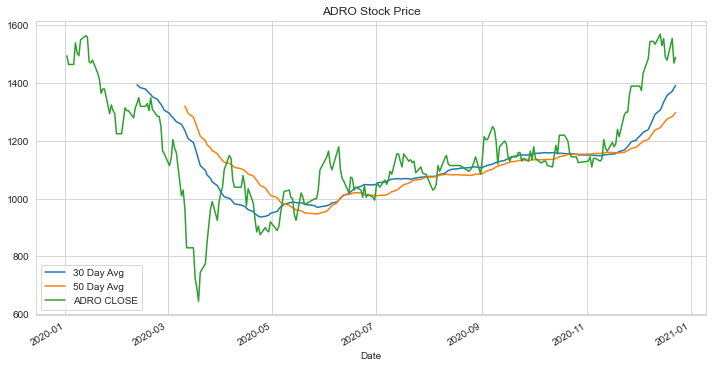

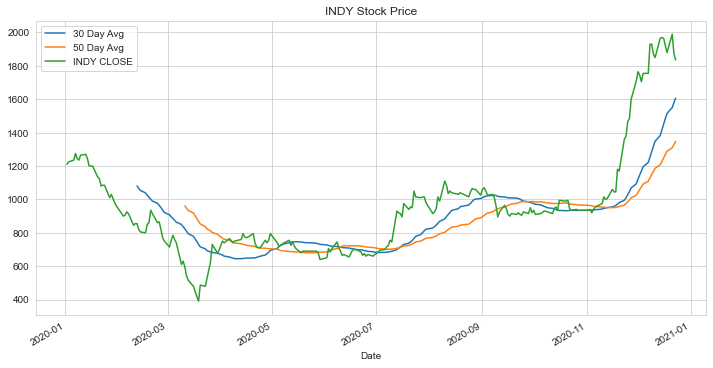

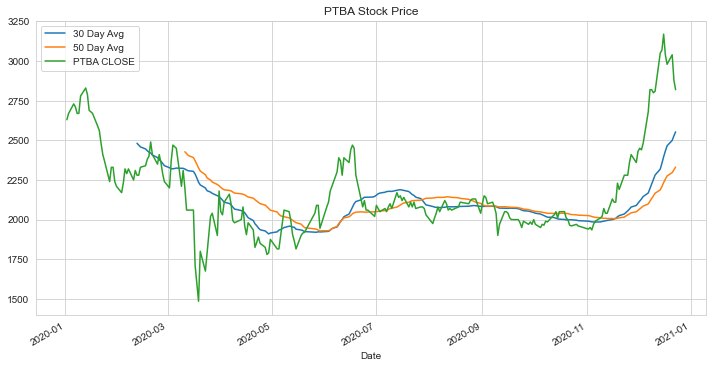

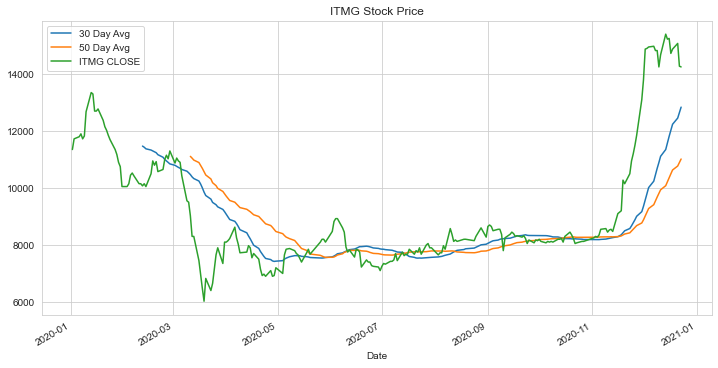

In [21]:
plt.figure(figsize=(12,6))
stocks_coal['ADRO']['Close'].loc['2020-01-01':'2021-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
stocks_coal['ADRO']['Close'].loc['2020-01-01':'2021-01-01'].rolling(window=50).mean().plot(label='50 Day Avg')
stocks_coal['ADRO']['Close'].loc['2020-01-01':'2021-01-01'].plot(label='ADRO CLOSE')
plt.legend()
plt.title('ADRO Stock Price')

plt.figure(figsize=(12,6))
stocks_coal['INDY']['Close'].loc['2020-01-01':'2021-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
stocks_coal['INDY']['Close'].loc['2020-01-01':'2021-01-01'].rolling(window=50).mean().plot(label='50 Day Avg')
stocks_coal['INDY']['Close'].loc['2020-01-01':'2021-01-01'].plot(label='INDY CLOSE')
plt.legend()
plt.title('INDY Stock Price')

plt.figure(figsize=(12,6))
stocks_coal['PTBA']['Close'].loc['2020-01-01':'2021-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
stocks_coal['PTBA']['Close'].loc['2020-01-01':'2021-01-01'].rolling(window=50).mean().plot(label='50 Day Avg')
stocks_coal['PTBA']['Close'].loc['2020-01-01':'2021-01-01'].plot(label='PTBA CLOSE')
plt.legend()
plt.title('PTBA Stock Price')

plt.figure(figsize=(12,6))
stocks_coal['ITMG']['Close'].loc['2020-01-01':'2021-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
stocks_coal['ITMG']['Close'].loc['2020-01-01':'2021-01-01'].rolling(window=50).mean().plot(label='50 Day Avg')
stocks_coal['ITMG']['Close'].loc['2020-01-01':'2021-01-01'].plot(label='ITMG CLOSE')
plt.legend()
plt.title('ITMG Stock Price')


## Analysis of Declining and Rising Prices in 2020

Based on the plot above, we can see that there was a declining in coal stocks price at Q1 of 2020, to be precise in March 2020. As we already know, there is a global pandemic of Covid-19 that started to spread and disrupt the economy around that time, and still happening right now. 

The same goes to coal industry, The international coal trade was seriously disrupted in 2020 by the Covid-19 crisis. Exports contracted by around 11%. Very few big markets increased their imports in 2020. As we can see, that disruption affected the Indonesia's coal stock prices. There were significant drops in prices at March 2020 ([IEA Reports](https://www.iea.org/reports/coal-2020), 2020).

### New Hope
As economic conditions started to come back to normal, so does the coal price. The increasing demand for coal, especially in a country like China, and India, as they account for 65% global coal demand, will become a rebound in coal prices (at least for a close future). Coal will continue to be the cornerstone of China's electricity supply in the coming decades. This increasing demand will lead to the increasing of global coal price too ([Kuykendall](https://www.spglobal.com/marketintelligence/en/news-insights/latest-news-headlines/coal-stumbled-globally-in-2020-but-no-sign-it-will-fade-away-quickly-8211-iea-61799042), 2020).

Indonesia as the largest exporter of coal surely affected by this, as we can see that the stock price had increased by around 100% since the drop in March 2020. Judging by the global economic condition right now and the increasing demand, it looks like that the price will keep increasing until it stabilized maybe in a few months or even years from now on.

## Correlation between coal stocks
Next, we will observe whether there are some correlations between stocks or not

<AxesSubplot:xlabel='Coal Ticker', ylabel='Coal Ticker'>

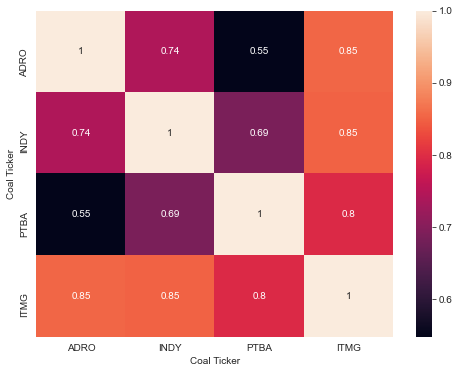

In [22]:
plt.figure(figsize=(8,6))
sns.heatmap(stocks_coal.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

There are some strong correlations between stock prices. It is understandable because this price movement refers to the world's coal price movement, so it is no wonder that if one's change then the others change as well. As we can see from distribution plot of each stocks return, that there is a similar characteristic between them

## Candle Plot

Now, let's use plotly to build a better interactive candle plot. Candle plot is one of the most understandable plot in stock market. It shows the price movement of the stocks, by displaying the green-red indicators. Green means that the price is moving positive, meanwhile red means that the price is moving negative.

Let's take a look of the price movement of each coal stocks in 2020.

In [23]:
stocks_coal['ADRO'][['Open', 'High', 'Low', 'Close']].loc['2020-01-01':'2021-01-01'].iplot(kind='candle', 
                                                                                           title='ADRO Candle Plot')


See the ADRO Candle Plot [here](https://chart-studio.plotly.com/~ihsan.alhasinun/7.embed)

In [24]:
stocks_coal['INDY'][['Open', 'High', 'Low', 'Close']].loc['2020-01-01':'2021-01-01'].iplot(kind='candle', 
                                                                                           title='INDY Candle Plot')


See the INDY Candle Plot [here](https://chart-studio.plotly.com/~ihsan.alhasinun/9.embed)

In [25]:
stocks_coal['PTBA'][['Open', 'High', 'Low', 'Close']].loc['2020-01-01':'2021-01-01'].iplot(kind='candle', 
                                                                                           title='PTBA Candle Plot')



See the PTBA Candle Plot [here](https://chart-studio.plotly.com/~ihsan.alhasinun/11.embed)

In [26]:
stocks_coal['ITMG'][['Open', 'High', 'Low', 'Close']].loc['2020-01-01':'2021-01-01'].iplot(kind='candle', 
                                                                                           title='ITMG Candle Plot')

See the ITMG Candle Plot [here](https://chart-studio.plotly.com/~ihsan.alhasinun/13.embed)

----------------------

By looking at the plots above, we can clearly see that for the Q1 of 2020 (by zooming into each plot), all of the stocks start plunging on March 5th. It was not long after the news of the first confirmed case of Covid-19 in Indonesia (March 2nd [[3]](https://news.detik.com/berita/d-4991485/kapan-sebenarnya-corona-pertama-kali-masuk-ri)), and mainly the first confirmed case in Jakarta (March 3rd [[4]](https://megapolitan.kompas.com/read/2020/07/01/15491691/psbb-transisi-di-jakarta-diperpanjang-14-hari)).

We can see that the prices of each stocks went down really deep, hitting the lowest rejection limit in each day until it reached the lowest point, collapsing around -50% in just 2 weeks. And starting from March 20th, the prices started to rise again.

There was one moment again that the prices went down, it was around first week of September. It was due to the news of the more restrictive Large Scale Social Restriction (PSBB) in Jakarta that will begin at September 14th [[5]](https://megapolitan.kompas.com/read/2020/09/13/14141431/dki-jakarta-terapkan-pengetatan-psbb-mulai-14-september-selama-2-pekan). The investors were afraid that the PSBB will be like the one that happened in the Q1 of 2020, the one that really disrupted the economy. But it turn out not to be very threatening, so the prices went up again, returning to the normal sideways position.

### Rising Moment
The prices started to rise at around November 2020, when everything started to return to normal (__well, not the covid-19 of course, it gets worse instead__). 
Let's hope that 2021 will be a better year, people will be more aware and not go outside during the pandemic to lower the case, and may the vaccine works!

# Conclusion

By doing some analysis on the coal stock prices data, we can see that the prices are really dependent to the world coal price, it can be seen in 2017. Coal sector is also affected by Covid-19 pandemic, as we can see in the first quarter of 2020. By the end of 2020, prices started to look better, and hopefully so does the world's condition..